In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

mpl.style.use('ggplot')
%matplotlib inline

In [2]:
country_df = pd.read_csv("country_regions.csv")
populations_df = pd.read_csv("population_total.csv")

In [8]:
corruption_df = pd.read_csv("data_political/corruption_perception_index_cpi.csv")
corruption_df

,country,2012,2013,2014,2015,2016,2017
0,Afghanistan,8.0,8.0,12.0,11.0,15.0,15
1,Albania,33.0,31.0,33.0,36.0,39.0,38
2,Algeria,34.0,36.0,36.0,36.0,34.0,33
3,Angola,22.0,23.0,19.0,15.0,18.0,19
4,Argentina,35.0,34.0,34.0,32.0,36.0,39
...,...,...,...,...,...,...,...
172,Venezuela,19.0,20.0,19.0,17.0,17.0,18
173,Vietnam,31.0,31.0,31.0,31.0,33.0,35
174,Yemen,23.0,18.0,19.0,18.0,14.0,16
175,Zambia,37.0,38.0,38.0,38.0,38.0,37


In [9]:
cpi_df = corruption_df

In [10]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   geo                               197 non-null    object 
 1   name                              197 non-null    object 
 2   four_regions                      197 non-null    object 
 3   eight_regions                     197 non-null    object 
 4   six_regions                       197 non-null    object 
 5   members_oecd_g77                  196 non-null    object 
 6   Latitude                          197 non-null    float64
 7   Longitude                         197 non-null    float64
 8   UN member since                   193 non-null    object 
 9   World bank region                 196 non-null    object 
 10  World bank, 4 income groups 2017  196 non-null    object 
 11  World bank, 3 income groups 2017  0 non-null      float64
dtypes: float

In [11]:
populations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: int64(301), object(1)
memory usage: 460.2+ KB


In [12]:
populations_df.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
1,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000


In [13]:
country_df.drop(columns=['World bank, 3 income groups 2017'], inplace=True)

In [14]:
country_df.drop(columns=['UN member since','members_oecd_g77','geo','World bank region','World bank, 4 income groups 2017'], inplace=True)

In [15]:
country_df.rename(columns={'name':'country'})

,country,four_regions,eight_regions,six_regions,Latitude,Longitude
0,Afghanistan,asia,asia_west,south_asia,33.00000,66.00000
1,Albania,europe,europe_east,europe_central_asia,41.00000,20.00000
2,Algeria,africa,africa_north,middle_east_north_africa,28.00000,3.00000
3,Andorra,europe,europe_west,europe_central_asia,42.50779,1.52109
4,Angola,africa,africa_sub_saharan,sub_saharan_africa,-12.50000,18.50000
...,...,...,...,...,...,...
192,Vietnam,asia,east_asia_pacific,east_asia_pacific,16.16667,107.83333
193,Yemen,asia,asia_west,middle_east_north_africa,15.50000,47.50000
194,Zambia,africa,africa_sub_saharan,sub_saharan_africa,-14.33333,28.50000
195,Zimbabwe,africa,africa_sub_saharan,sub_saharan_africa,-19.00000,29.75000


In [16]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           197 non-null    object 
 1   four_regions   197 non-null    object 
 2   eight_regions  197 non-null    object 
 3   six_regions    197 non-null    object 
 4   Latitude       197 non-null    float64
 5   Longitude      197 non-null    float64
dtypes: float64(2), object(4)
memory usage: 9.4+ KB


In [17]:
populations_df['country'].dtypes

dtype('O')

In [18]:
country_df.rename(columns={'name':'country'},inplace=True)

In [19]:
country_df.head(2)

,country,four_regions,eight_regions,six_regions,Latitude,Longitude
0,Afghanistan,asia,asia_west,south_asia,33.0,66.0
1,Albania,europe,europe_east,europe_central_asia,41.0,20.0


### CPI - Corruption Perception Index - Transparency International's score of perceptions of corruption. Higher values indicate LESS corruption

In [20]:
cpiregions_df = pd.merge(country_df,cpi_df,on='country')

In [21]:
cpiregions_df

,country,four_regions,eight_regions,six_regions,Latitude,Longitude,2012,2013,2014,2015,2016,2017
0,Afghanistan,asia,asia_west,south_asia,33.00000,66.00000,8.0,8.0,12.0,11.0,15.0,15
1,Albania,europe,europe_east,europe_central_asia,41.00000,20.00000,33.0,31.0,33.0,36.0,39.0,38
2,Algeria,africa,africa_north,middle_east_north_africa,28.00000,3.00000,34.0,36.0,36.0,36.0,34.0,33
3,Angola,africa,africa_sub_saharan,sub_saharan_africa,-12.50000,18.50000,22.0,23.0,19.0,15.0,18.0,19
4,Argentina,americas,america_south,america,-34.00000,-64.00000,35.0,34.0,34.0,32.0,36.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...
171,Vietnam,asia,east_asia_pacific,east_asia_pacific,16.16667,107.83333,31.0,31.0,31.0,31.0,33.0,35
172,Yemen,asia,asia_west,middle_east_north_africa,15.50000,47.50000,23.0,18.0,19.0,18.0,14.0,16
173,Zambia,africa,africa_sub_saharan,sub_saharan_africa,-14.33333,28.50000,37.0,38.0,38.0,38.0,38.0,37
174,Zimbabwe,africa,africa_sub_saharan,sub_saharan_africa,-19.00000,29.75000,20.0,21.0,21.0,21.0,22.0,22


In [22]:
cpi_regions_mean = cpiregions_df.groupby('eight_regions')[['2012','2013','2014','2015','2016','2017']].mean()
cpi_regions_mean

,2012,2013,2014,2015,2016,2017
eight_regions,,,,,,
africa_north,33.500000,32.833333,34.000000,32.666667,31.666667,32.500000
africa_sub_saharan,33.297872,32.041667,32.702128,32.260870,31.488889,32.041667
america_north,48.684211,47.578947,48.315789,41.857143,46.800000,46.800000
america_south,39.250000,39.166667,39.583333,38.500000,39.583333,39.833333
asia_west,35.600000,34.680000,35.760000,36.440000,35.346154,35.538462
east_asia_pacific,43.631579,44.157895,43.444444,43.277778,44.950000,45.333333
europe_east,45.086957,45.391304,45.869565,46.434783,47.043478,47.173913
europe_west,70.950000,70.800000,71.550000,72.900000,71.500000,71.550000


In [23]:
master_df = pd.merge(country_df,populations_df,on='country')
master_df

,country,four_regions,eight_regions,six_regions,Latitude,Longitude,1800,1801,1802,1803,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,asia,asia_west,south_asia,33.00000,66.00000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
1,Albania,europe,europe_east,europe_central_asia,41.00000,20.00000,400000,402000,404000,405000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
2,Algeria,africa,africa_north,middle_east_north_africa,28.00000,3.00000,2500000,2510000,2520000,2530000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000
3,Andorra,europe,europe_west,europe_central_asia,42.50779,1.52109,2650,2650,2650,2650,...,63000,62900,62900,62800,62700,62700,62600,62500,62500,62400
4,Angola,africa,africa_sub_saharan,sub_saharan_africa,-12.50000,18.50000,1570000,1570000,1570000,1570000,...,168000000,170000000,172000000,175000000,177000000,179000000,182000000,184000000,186000000,188000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vietnam,asia,east_asia_pacific,east_asia_pacific,16.16667,107.83333,4000000,4100000,4200000,4310000,...,100000000,100000000,99700000,99400000,99100000,98800000,98400000,98100000,97800000,97400000
190,Yemen,asia,asia_west,middle_east_north_africa,15.50000,47.50000,2590000,2590000,2590000,2590000,...,54500000,54400000,54300000,54100000,54000000,53800000,53700000,53500000,53400000,53200000
191,Zambia,africa,africa_sub_saharan,sub_saharan_africa,-14.33333,28.50000,747000,758000,770000,782000,...,74400000,75200000,76000000,76800000,77600000,78400000,79200000,80000000,80800000,81500000
192,Zimbabwe,africa,africa_sub_saharan,sub_saharan_africa,-19.00000,29.75000,1090000,1090000,1090000,1090000,...,30800000,30900000,30900000,30900000,30900000,30900000,31000000,31000000,31000000,31000000


In [24]:
population_df = master_df
population_df

,country,four_regions,eight_regions,six_regions,Latitude,Longitude,1800,1801,1802,1803,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,asia,asia_west,south_asia,33.00000,66.00000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
1,Albania,europe,europe_east,europe_central_asia,41.00000,20.00000,400000,402000,404000,405000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
2,Algeria,africa,africa_north,middle_east_north_africa,28.00000,3.00000,2500000,2510000,2520000,2530000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000
3,Andorra,europe,europe_west,europe_central_asia,42.50779,1.52109,2650,2650,2650,2650,...,63000,62900,62900,62800,62700,62700,62600,62500,62500,62400
4,Angola,africa,africa_sub_saharan,sub_saharan_africa,-12.50000,18.50000,1570000,1570000,1570000,1570000,...,168000000,170000000,172000000,175000000,177000000,179000000,182000000,184000000,186000000,188000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vietnam,asia,east_asia_pacific,east_asia_pacific,16.16667,107.83333,4000000,4100000,4200000,4310000,...,100000000,100000000,99700000,99400000,99100000,98800000,98400000,98100000,97800000,97400000
190,Yemen,asia,asia_west,middle_east_north_africa,15.50000,47.50000,2590000,2590000,2590000,2590000,...,54500000,54400000,54300000,54100000,54000000,53800000,53700000,53500000,53400000,53200000
191,Zambia,africa,africa_sub_saharan,sub_saharan_africa,-14.33333,28.50000,747000,758000,770000,782000,...,74400000,75200000,76000000,76800000,77600000,78400000,79200000,80000000,80800000,81500000
192,Zimbabwe,africa,africa_sub_saharan,sub_saharan_africa,-19.00000,29.75000,1090000,1090000,1090000,1090000,...,30800000,30900000,30900000,30900000,30900000,30900000,31000000,31000000,31000000,31000000


### Gini shows income inequality in a society. A higher number means more inequality

In [25]:
gini_df = pd.read_csv("data_political/gini.csv")

In [26]:
gini_df.head(10)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2,Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,...,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
4,Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6
5,Antigua and Barbuda,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
6,Argentina,47.7,47.7,47.7,47.7,47.7,47.7,47.7,47.7,47.7,...,42.4,42.4,42.4,42.4,42.4,42.4,42.4,42.4,42.4,42.4
7,Armenia,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,...,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6
8,Australia,38.7,38.7,38.7,38.7,38.7,38.7,38.7,38.7,38.7,...,32.3,32.3,32.3,32.3,32.3,32.3,32.3,32.3,32.3,32.3
9,Austria,33.4,33.4,33.4,33.4,33.4,33.4,33.4,33.4,33.4,...,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5


In [27]:
gini_country_df = pd.merge(country_df,gini_df,on='country')

In [28]:
eightregions_gini = gini_country_df.groupby('eight_regions')[['1800','1850','1900','1950','2000','2020']].mean()
eightregions_gini

,1800,1850,1900,1950,2000,2020
eight_regions,,,,,,
africa_north,49.383333,51.816667,35.533333,37.983333,37.683333,36.483333
africa_sub_saharan,43.702083,42.935417,41.112500,43.022917,44.754167,43.495833
america_north,42.986957,41.600000,43.091304,44.095652,46.295652,44.000000
america_south,47.550000,46.441667,45.883333,45.208333,53.250000,47.025000
asia_west,38.096296,39.062963,35.014815,36.940741,37.222222,36.096296
east_asia_pacific,37.363333,36.613333,37.593333,38.520000,38.623333,37.580000
europe_east,39.000000,38.056522,34.930435,30.513043,32.239130,31.460870
europe_west,41.772000,38.060000,36.176000,33.412000,32.604000,33.268000


In [29]:
population_df.groupby('eight_regions')['1950'].mean()

eight_regions
africa_north          7.192000e+06
africa_sub_saharan    3.842090e+06
america_north         9.775226e+06
america_south         9.478500e+06
asia_west             1.970827e+07
east_asia_pacific     2.817075e+07
europe_east           1.090022e+07
europe_west           1.307995e+07
Name: 1950, dtype: float64

In [30]:
population_df['2019']

0      38000000
1       2880000
2      43100000
3         77100
4      31800000
         ...   
189    96500000
190    29200000
191    17900000
192    14600000
193    11100000
Name: 2019, Length: 194, dtype: int64

Remove Scientific Notation

In [31]:
pd.set_option('display.float_format', lambda x: '%1.0f' % x)

Reset display so that scientific notation shows

In [32]:
pd.reset_option('display.float_format')

## Democracy Index (EIU), Electoral pluralism index, gov't index, political participation index, political culture index, civil liberties index


In [33]:
eiu_df = pd.read_csv("data_political/all.csv")
eiu_df

,geo,name,time,Democracy index (EIU),Electoral pluralism index (EIU),Government index (EIU),Political participation index(EIU),Political culture index (EIU),Civil liberties index (EIU),Change in democracy index (EIU)
0,afg,Afghanistan,2006,30.6,61.70,0.00,22.2,25.0,44.10,NaN
1,afg,Afghanistan,2007,30.4,56.70,3.95,22.2,25.0,44.10,-0.2
2,afg,Afghanistan,2008,30.2,51.70,7.90,22.2,25.0,44.10,-0.2
3,afg,Afghanistan,2009,27.5,38.35,7.90,25.0,25.0,41.15,-2.7
4,afg,Afghanistan,2010,24.8,25.00,7.90,27.8,25.0,38.20,-2.7
...,...,...,...,...,...,...,...,...,...,...
2333,zwe,Zimbabwe,2015,30.5,5.00,20.00,38.9,56.3,32.40,2.7
2334,zwe,Zimbabwe,2016,30.5,5.00,20.00,38.9,56.3,32.40,0.0
2335,zwe,Zimbabwe,2017,31.6,5.00,20.00,44.4,56.3,32.40,1.1
2336,zwe,Zimbabwe,2018,31.6,5.00,20.00,44.4,56.3,32.40,0.0


# Economic Data - Poverty percentages, 1.90/day, 3.20/day, & 5.50/day

In [51]:
poverty550.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        163 non-null    object 
 1   four_regions   163 non-null    object 
 2   eight_regions  163 non-null    object 
 3   six_regions    163 non-null    object 
 4   Latitude       163 non-null    float64
 5   Longitude      163 non-null    float64
 6   1967           1 non-null      float64
 7   1968           0 non-null      float64
 8   1969           1 non-null      float64
 9   1970           0 non-null      float64
 10  1971           1 non-null      float64
 11  1972           0 non-null      float64
 12  1973           0 non-null      float64
 13  1974           2 non-null      float64
 14  1975           2 non-null      float64
 15  1976           0 non-null      float64
 16  1977           1 non-null      float64
 17  1978           1 non-null      float64
 18  1979      

In [52]:
poverty550.drop(poverty550.iloc[:,4:39], axis=1, inplace=True)

In [53]:
poverty550.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        163 non-null    object 
 1   four_regions   163 non-null    object 
 2   eight_regions  163 non-null    object 
 3   six_regions    163 non-null    object 
 4   2000           48 non-null     float64
 5   2001           35 non-null     float64
 6   2002           50 non-null     float64
 7   2003           55 non-null     float64
 8   2004           72 non-null     float64
 9   2005           74 non-null     float64
 10  2006           72 non-null     float64
 11  2007           71 non-null     float64
 12  2008           72 non-null     float64
 13  2009           75 non-null     float64
 14  2010           81 non-null     float64
 15  2011           74 non-null     float64
 16  2012           77 non-null     float64
 17  2013           74 non-null     float64
 18  2014      

## Poverty Data Cleaning

In [54]:
poverty190.head(3)

,country,four_regions,eight_regions,six_regions,Latitude,Longitude,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Albania,europe,europe_east,europe_central_asia,41.0,20.0,NaN,NaN,0.02,NaN,...,NaN,NaN,NaN,0.011,NaN,0.019,0.013,0.011,0.017,NaN
1,Algeria,africa,africa_north,middle_east_north_africa,28.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,africa,africa_sub_saharan,sub_saharan_africa,-12.5,18.5,0.323,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476


In [55]:
pov190_2010 = poverty190.groupby('eight_regions')['2010'].apply(lambda x: x.mean() * 100)
pov190_2010

eight_regions
africa_north           1.850000
africa_sub_saharan    50.155556
america_north          4.350000
america_south          4.433333
asia_west              5.950000
east_asia_pacific      4.930000
europe_east            1.544444
europe_west            0.295000
Name: 2010, dtype: float64

In [56]:
type(pov190_2010)

pandas.core.series.Series

### Get the average percentage for each region for 2010-2018

In [57]:
pov190_2010up = poverty190.groupby('eight_regions')[['2010','2011','2012','2013','2014','2015','2016','2017','2018']].apply(lambda x: x.mean() * 100)
pov190_2010up

,2010,2011,2012,2013,2014,2015,2016,2017,2018
eight_regions,,,,,,,,,
africa_north,1.850000,0.500000,9.800000,11.850000,NaN,0.750000,NaN,10.150000,NaN
africa_sub_saharan,50.155556,43.744444,39.650000,43.233333,29.855556,29.540000,41.683333,24.666667,43.850000
america_north,4.350000,5.820000,8.585714,4.085714,5.200000,4.680000,4.175000,4.660000,3.866667
america_south,4.433333,3.866667,3.950000,2.922222,2.875000,2.925000,3.137500,2.533333,2.700000
asia_west,5.950000,5.183333,1.666667,2.375000,3.466667,2.300000,2.312500,0.825000,0.900000
east_asia_pacific,4.930000,4.380000,6.850000,6.111111,6.200000,3.028571,1.920000,2.566667,1.750000
europe_east,1.544444,1.373684,1.619048,1.575000,1.552381,1.361905,1.255000,1.157895,0.957143
europe_west,0.295000,0.345000,0.347368,0.375000,0.331579,0.390000,0.352632,0.331250,NaN


### Fill the (blank values) NaNs with the average average

In [59]:
# Africa_North has 3 Nans, & Europe_West has 1
#pov190_2010up['africa_north'].fillna(pov190_2010up['africa_north'].mean())

### OK, you're specifying a column that doesn't exist. 'africa_north' is a row

In [60]:
## GREAT JOB!!! Use the indexing method to specifiy the row & columns to operate on, using the same data to create the
## mean values to fillna!!! 
pov190_2010up.loc['africa_north',:].fillna(pov190_2010up.loc['africa_north',:].mean(), inplace=True)

In [61]:
# Same as above cell. See 3 cells up to see the NaNs that need filling
pov190_2010up.loc['europe_west',:].fillna(pov190_2010up.loc['europe_west',:].mean(), inplace=True)

In [62]:
pov190_2010up = pov190_2010up.reset_index()

In [2]:
pov190_2010up

NameError: name 'pov190_2010up' is not defined

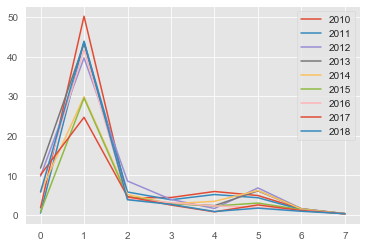

In [64]:
pov190_2010up.plot(kind='line')

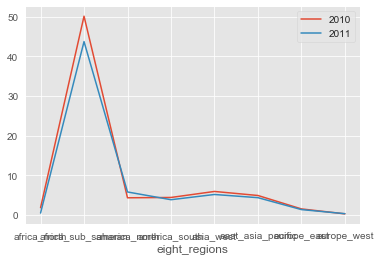

In [65]:
ax = plt.gca()

pov190_2010up.plot(kind='line',x='eight_regions',y='2010',ax=ax)
pov190_2010up.plot(kind='line',x='eight_regions',y='2011',ax=ax)

In [66]:
pov190_2010up.pivot(columns='eight_regions', values=['2010','2011','2012','2013','2014','2015','2016','2017','2018'])

2010                                                 \
eight_regions africa_north africa_sub_saharan america_north america_south   
0                     1.85                NaN           NaN           NaN   
1                      NaN          50.155556           NaN           NaN   
2                      NaN                NaN          4.35           NaN   
3                      NaN                NaN           NaN      4.433333   
4                      NaN                NaN           NaN           NaN   
5                      NaN                NaN           NaN           NaN   
6                      NaN                NaN           NaN           NaN   
7                      NaN                NaN           NaN           NaN   

                                                                   \
eight_regions asia_west east_asia_pacific europe_east europe_west   
0                   NaN               NaN         NaN         NaN   
1                   NaN               NaN         NaN         NaN   
2                   NaN               NaN         NaN         NaN   
3                   NaN               NaN         NaN         NaN   
4                  5.95               NaN         NaN         NaN   
5                   NaN              4.93         NaN         NaN   
6                   NaN               NaN    1.544444         NaN   
7                   NaN               NaN         NaN       0.295   

                      2011                     ...        2017              \
eight_regions africa_north africa_sub_saharan  ... europe_east europe_west   
0                      0.5                NaN  ...         NaN         NaN   
1                      NaN          43.744444  ...         NaN         NaN   
2                      NaN                NaN  ...         NaN         NaN   
3                      NaN                NaN  ...         NaN         NaN   
4                      NaN                NaN  ...         NaN         NaN   
5                      NaN                NaN  ...         NaN         NaN   
6                      NaN                NaN  ...    1.157895         NaN   
7                      NaN                NaN  ...         NaN     0.33125   

                      2018                                                 \
eight_regions africa_north africa_sub_saharan america_north america_south   
0                 5.816667                NaN           NaN           NaN   
1                      NaN              43.85           NaN           NaN   
2                      NaN                NaN      3.866667           NaN   
3                      NaN                NaN           NaN           2.7   
4                      NaN                NaN           NaN           NaN   
5                      NaN                NaN           NaN           NaN   
6                      NaN                NaN           NaN           NaN   
7                      NaN                NaN           NaN           NaN   

                                                                   
eight_regions asia_west east_asia_pacific europe_east europe_west  
0                   NaN               NaN         NaN         NaN  
1                   NaN               NaN         NaN         NaN  
2                   NaN               NaN         NaN         NaN  
3                   NaN               NaN         NaN         NaN  
4                   0.9               NaN         NaN         NaN  
5                   NaN              1.75         NaN         NaN  
6                   NaN               NaN    0.957143         NaN  
7                   NaN               NaN         NaN    0.345979  

[8 rows x 72 columns]

In [67]:
pov190_2010up

,eight_regions,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,africa_north,1.850000,0.500000,9.800000,11.850000,5.816667,0.750000,5.816667,10.150000,5.816667
1,africa_sub_saharan,50.155556,43.744444,39.650000,43.233333,29.855556,29.540000,41.683333,24.666667,43.850000
2,america_north,4.350000,5.820000,8.585714,4.085714,5.200000,4.680000,4.175000,4.660000,3.866667
3,america_south,4.433333,3.866667,3.950000,2.922222,2.875000,2.925000,3.137500,2.533333,2.700000
4,asia_west,5.950000,5.183333,1.666667,2.375000,3.466667,2.300000,2.312500,0.825000,0.900000
5,east_asia_pacific,4.930000,4.380000,6.850000,6.111111,6.200000,3.028571,1.920000,2.566667,1.750000
6,europe_east,1.544444,1.373684,1.619048,1.575000,1.552381,1.361905,1.255000,1.157895,0.957143
7,europe_west,0.295000,0.345000,0.347368,0.375000,0.331579,0.390000,0.352632,0.331250,0.345979


In [1]:
pov190_transposed = pov190_2010up.transpose()
pov190_transposed

NameError: name 'pov190_2010up' is not defined

In [69]:
pov190_transposed.reset_index()

,index,0,1,2,3,4,5,6,7
0,eight_regions,africa_north,africa_sub_saharan,america_north,america_south,asia_west,east_asia_pacific,europe_east,europe_west
1,2010,1.85,50.1556,4.35,4.43333,5.95,4.93,1.54444,0.295
2,2011,0.5,43.7444,5.82,3.86667,5.18333,4.38,1.37368,0.345
3,2012,9.8,39.65,8.58571,3.95,1.66667,6.85,1.61905,0.347368
4,2013,11.85,43.2333,4.08571,2.92222,2.375,6.11111,1.575,0.375
5,2014,5.81667,29.8556,5.2,2.875,3.46667,6.2,1.55238,0.331579
6,2015,0.75,29.54,4.68,2.925,2.3,3.02857,1.3619,0.39
7,2016,5.81667,41.6833,4.175,3.1375,2.3125,1.92,1.255,0.352632
8,2017,10.15,24.6667,4.66,2.53333,0.825,2.56667,1.15789,0.33125
9,2018,5.81667,43.85,3.86667,2.7,0.9,1.75,0.957143,0.345979
